# Main Jupyter Notebook

## Data preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from dython import nominal
sb.set()

# Objective
It is observed that there are alot of materials (based on number of counts) for courses such as:
- Development 
- IT & Sofware 
- Teaching & Academics
- Business
- Personal development

However, it is notice that there are demands (based on number of subscribers) for low count material courses such as:
- Office Productivity
- Marketing
- Design
- Photography & Video
- Design

In this study, we would like to find out the likely if a new fees course in certain catergory will have more subscriber (= to more revenue made)


In [2]:
from importnb import imports
with imports("ipynb"):
    from contributions.amizzuddin.amizzuddin import (
        clean_up_dataset,
        remove_outliers,
        generate_numerical_eda_visualization
    )

CsvDataset = pd.read_csv("dataset/Course_info.csv")
ExtractDatasetOfInterest = pd.DataFrame(
    CsvDataset[[
        'price', 
        'num_subscribers', 
        'avg_rating', 
        'num_lectures',
        'content_length_min', 
        'category',
        'subcategory',
        'language'
    ]]
)
categorical_feature_in_numerical = ['avg_rating']

In [3]:
# ExtractDatasetOfInterest.info()

In [4]:
# We are not interested with free course, 0 subscribers
CleanupDataset = clean_up_dataset(ExtractDatasetOfInterest)
CleanupDataset.info()

price: <class 'str'> -> float64, 0
num_subscribers: <class 'str'> -> int64, 0
avg_rating: <class 'str'> -> float64, 0
num_lectures: <class 'str'> -> int64, 0
content_length_min: <class 'str'> -> int64, 0
category: <class 'str'> -> category, 0
subcategory: <class 'str'> -> category, 0
language: <class 'str'> -> category, 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5771 entries, 5 to 203341
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   price               5771 non-null   float64 
 1   num_subscribers     5771 non-null   int64   
 2   avg_rating          5771 non-null   float64 
 3   num_lectures        5771 non-null   int64   
 4   content_length_min  5771 non-null   int64   
 5   category            5771 non-null   category
 6   subcategory         5771 non-null   category
 7   language            5771 non-null   category
dtypes: category(3), float64(2), int64(3)
memory usage: 301.5 KB


In [5]:
# RemovedOutlierDataset = remove_outliers(RemovedOutlierDataset, categorical_feature_in_numerical)
RemovedOutlierDataset = remove_outliers(CleanupDataset, [])
RemovedOutlierDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4218 entries, 0 to 4217
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   price               4218 non-null   float64 
 1   num_subscribers     4218 non-null   int64   
 2   avg_rating          4218 non-null   float64 
 3   num_lectures        4218 non-null   int64   
 4   content_length_min  4218 non-null   int64   
 5   category            4218 non-null   category
 6   subcategory         4218 non-null   category
 7   language            4218 non-null   category
dtypes: category(3), float64(2), int64(3)
memory usage: 189.8 KB


In [6]:
# Verify the claim made in objective, we will print the top 10 for most course material and most course subscribers
# knowing the top 10 course, should remove data that has no relation to study and do EDA from there
TopTenMostCourseMaterial = RemovedOutlierDataset['category'].value_counts()
print(f"Top 10 most material course: \n{TopTenMostCourseMaterial.head(20)}\n")


Top 10 most material course: 
Development             1456
IT & Software            805
Business                 433
Design                   294
Teaching & Academics     221
Finance & Accounting     212
Office Productivity      207
Marketing                183
Personal Development     150
Photography & Video       75
Lifestyle                 69
Health & Fitness          62
Music                     51
Name: category, dtype: int64



In [7]:
TopTenMostDemandCourse = RemovedOutlierDataset.groupby('category')['num_subscribers'].median().sort_values(ascending=False)
print(f"Top 10 most demand course: \n{TopTenMostDemandCourse.head(10)}")

Top 10 most demand course: 
category
Finance & Accounting    21186.5
Marketing               20099.0
Design                  19376.5
Development             19124.0
Office Productivity     19049.0
Business                19019.0
IT & Software           18467.0
Lifestyle               17165.0
Personal Development    17150.0
Photography & Video     16758.0
Name: num_subscribers, dtype: float64


In [8]:
TopTenMostExpensiveCourse = RemovedOutlierDataset.groupby('category')['price'].median().sort_values(ascending=False)
print(f"Top 10 most expensive course: \n{TopTenMostExpensiveCourse.head(10)}")

Top 10 most expensive course: 
category
Finance & Accounting    199.99
Marketing               199.99
Music                   169.99
Personal Development    162.49
Business                159.99
Health & Fitness        154.99
Lifestyle               139.99
Design                  129.99
Development              99.99
Office Productivity      99.99
Name: price, dtype: float64


In [9]:
# Since can confirm that Business, Development, Design, marketing and 

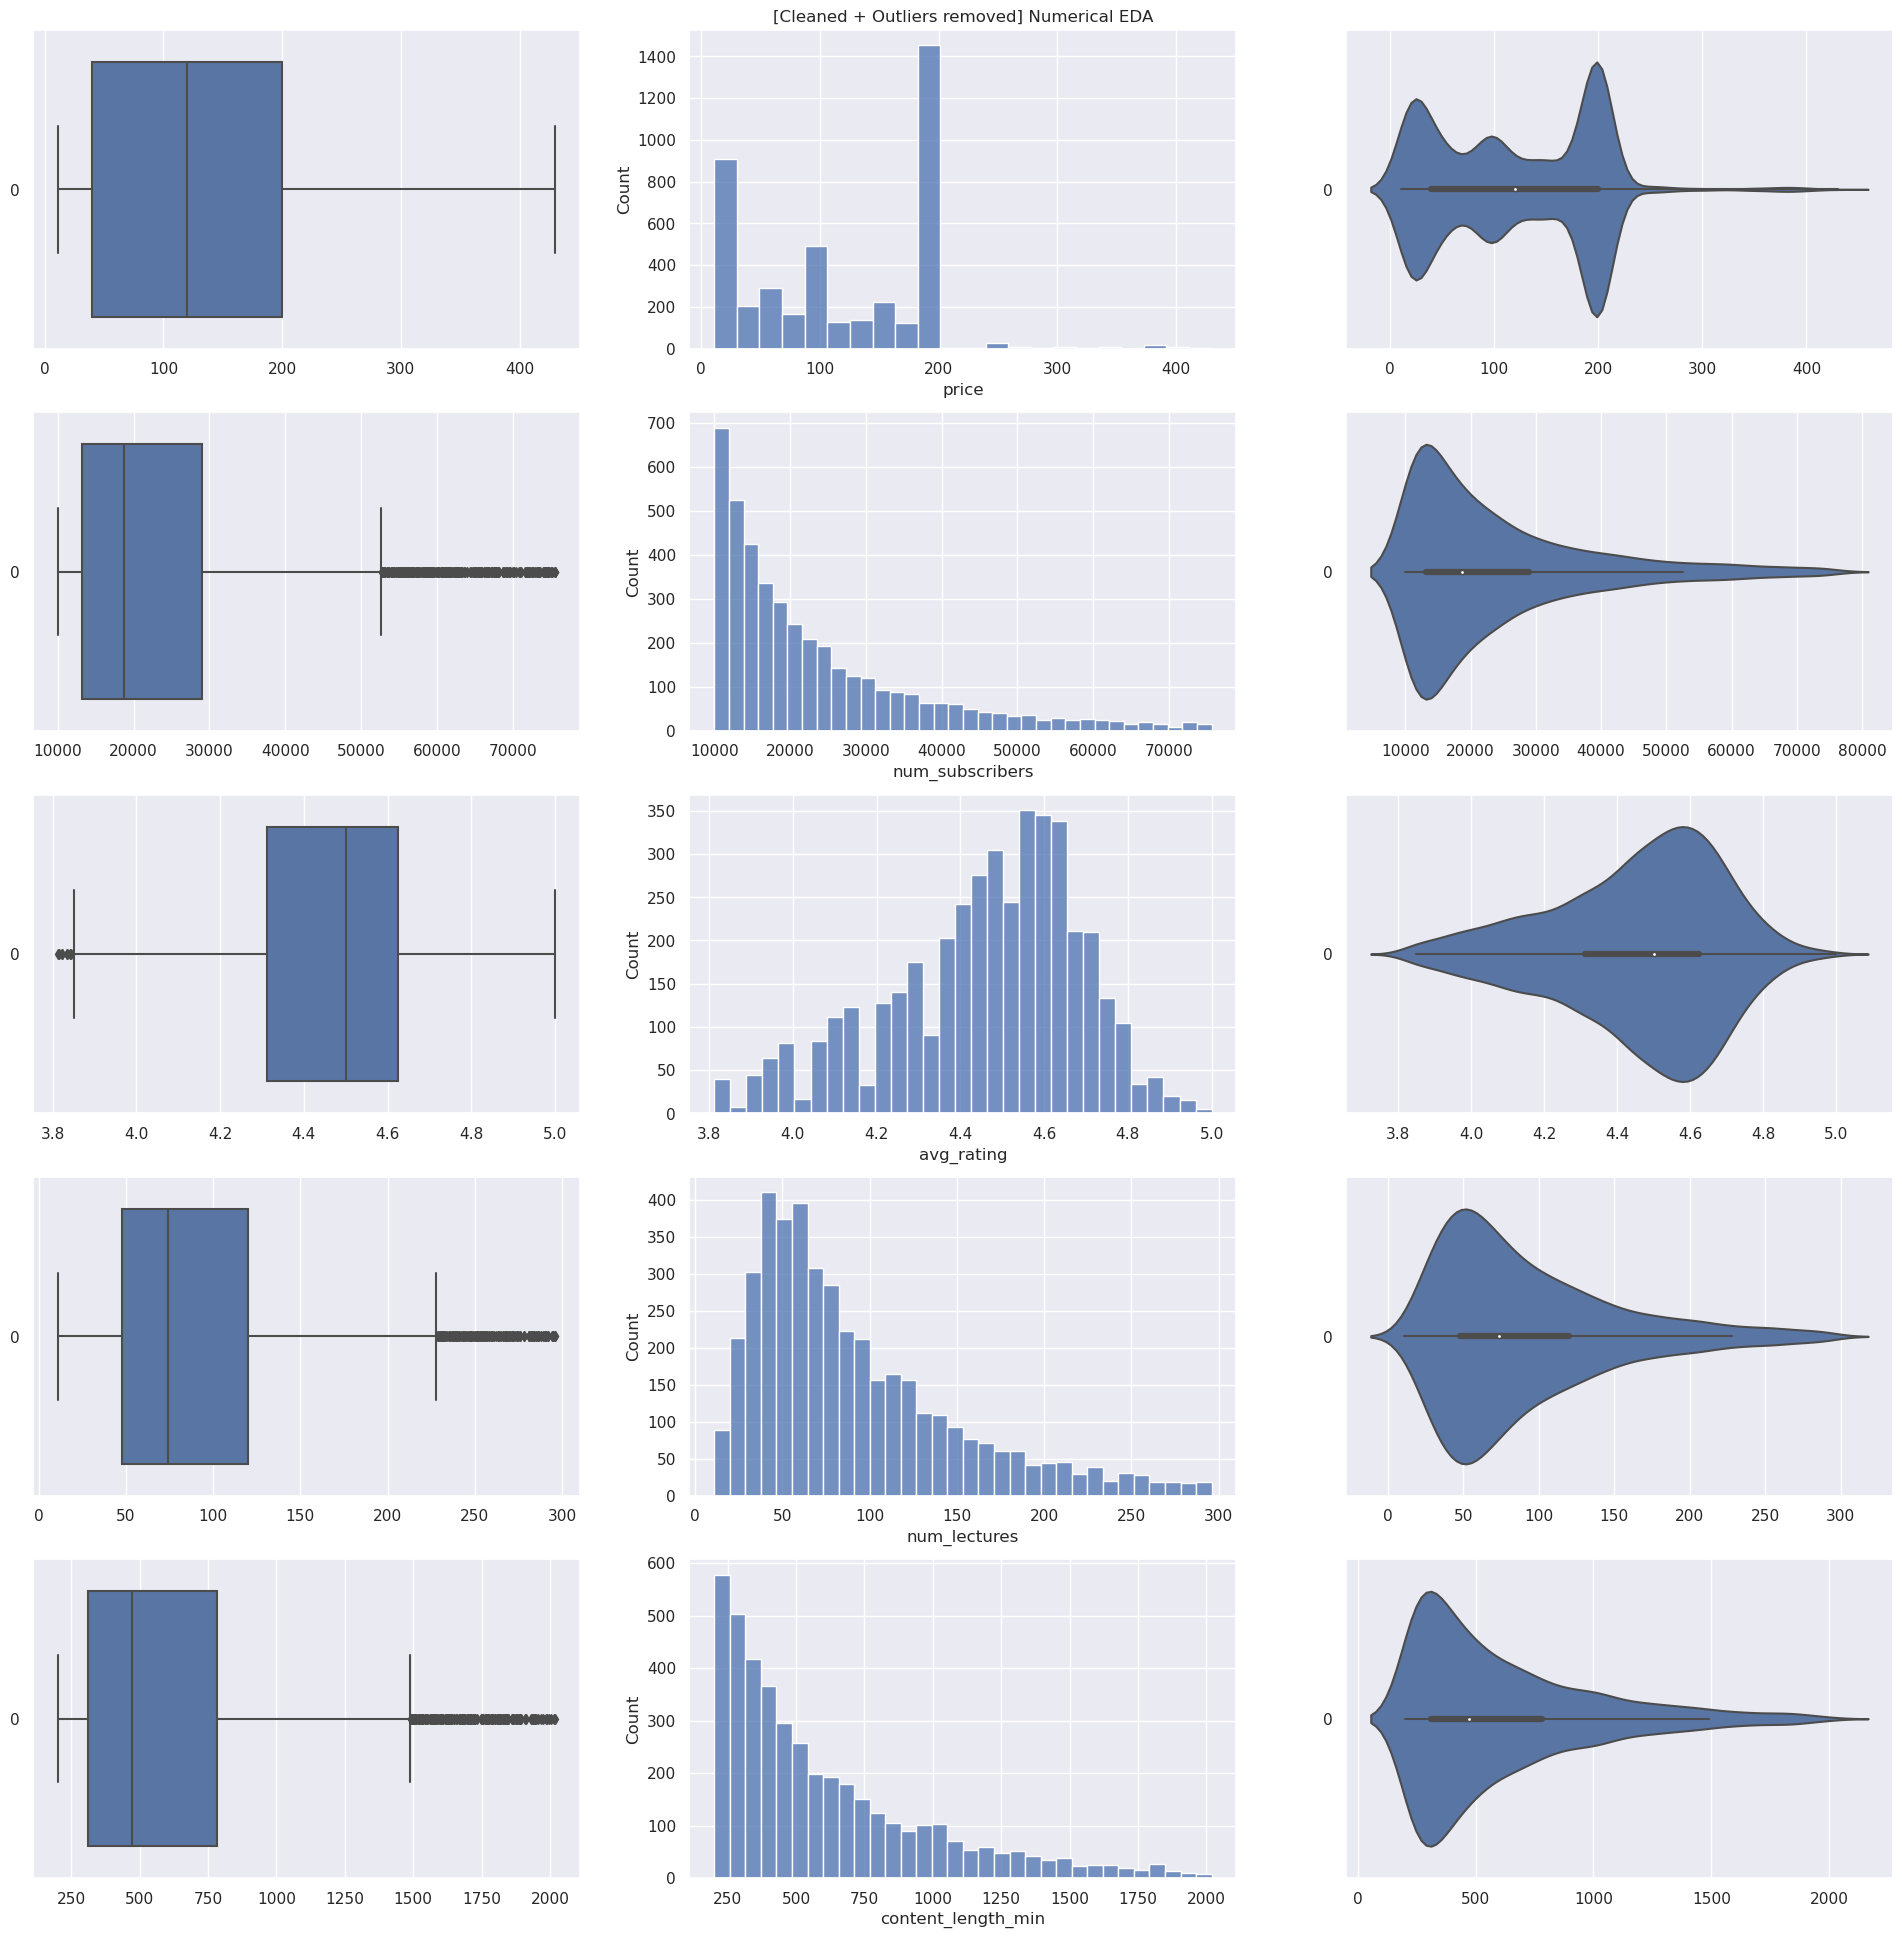

In [10]:
generate_numerical_eda_visualization(RemovedOutlierDataset, [], "[Cleaned + Outliers removed] Numerical EDA")

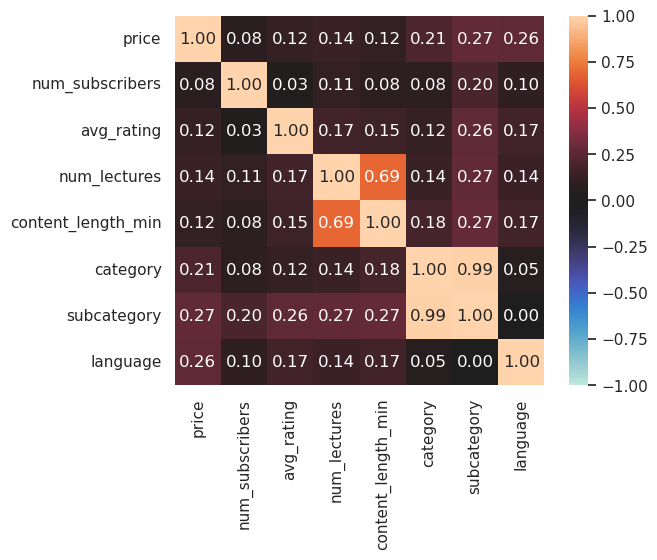

{'corr':                        price  num_subscribers  avg_rating  num_lectures  \
 price               1.000000         0.075892    0.119803      0.136633   
 num_subscribers     0.075892         1.000000    0.032572      0.112745   
 avg_rating          0.119803         0.032572    1.000000      0.165210   
 num_lectures        0.136633         0.112745    0.165210      1.000000   
 content_length_min  0.116629         0.081273    0.149634      0.691565   
 category            0.205177         0.084751    0.121759      0.137032   
 subcategory         0.273417         0.199788    0.261266      0.271717   
 language            0.260538         0.097690    0.173934      0.140964   
 
                     content_length_min  category  subcategory  language  
 price                         0.116629  0.205177     0.273417  0.260538  
 num_subscribers               0.081273  0.084751     0.199788  0.097690  
 avg_rating                    0.149634  0.121759     0.261266  0.173934  
 num_l

In [11]:
# generate catergorical vs numerical data
nominal.associations(RemovedOutlierDataset)

In [12]:
RemovedOutlierDataset.describe()

,price,num_subscribers,avg_rating,num_lectures,content_length_min
count,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000
mean,121.032496,23550.443338,4.458234,91.194642,604.637032
std,77.315410,14080.879221,0.229964,59.061306,384.924483
min,11.000000,10002.000000,3.812500,11.000000,201.000000
25%,39.990000,13206.250000,4.312500,48.000000,311.000000
50%,119.990000,18692.500000,4.500000,74.000000,474.000000
75%,199.990000,28981.250000,4.625000,120.000000,782.750000
max,429.990000,75607.000000,5.000000,296.000000,2019.000000
